In [1]:
p = 50
N = 100
set.seed(1)
X_train = array(rnorm(p*N),c(N,p))
eps_train = rnorm(N)
Nte = 10^3
X_te = array(rnorm(p*Nte),c(Nte,p))
eps_te = rnorm(Nte)
grid = 10^seq(10,-2,length = 100)

In [4]:
# Define coefficients for the model
beta <- rep(0, p)
beta[1:5] <- 2

# Generate the training response variable
Y_train <- X_train %*% beta + eps_train
# Generate the testing response variable
Y_te <- X_te %*% beta + eps_te

In [6]:
# Cross-validate Ridge Regression
library(glmnet)
cv_ridge <- cv.glmnet(X_train, Y_train, alpha = 0, lambda = grid)
lambda_ridge_best <- cv_ridge$lambda.min
ridge_model <- glmnet(X_train, Y_train, alpha = 0, lambda = lambda_ridge_best)
ridge_pred <- predict(ridge_model, newx = X_te, s = lambda_ridge_best)
ridge_test_error <- mean((Y_te - ridge_pred)^2)

# Cross-validate Lasso Regression
cv_lasso <- cv.glmnet(X_train, Y_train, alpha = 1, lambda = grid)
lambda_lasso_best <- cv_lasso$lambda.min
lasso_model <- glmnet(X_train, Y_train, alpha = 1, lambda = lambda_lasso_best)
lasso_pred <- predict(lasso_model, newx = X_te, s = lambda_lasso_best)
lasso_test_error <- mean((Y_te - lasso_pred)^2)

# Output best lambdas and test errors for both methods
list(ridge_lambda = lambda_ridge_best, 
     lasso_lambda = lambda_lasso_best, 
     ridge_test_error = ridge_test_error, 
     lasso_test_error = lasso_test_error)

Loading required package: Matrix

Loaded glmnet 4.1-8



$ridge_lambda
[1] 0.1629751

$lasso_lambda
[1] 0.03053856

$ridge_test_error
[1] 2.25593

$lasso_test_error
[1] 1.500139

In [7]:
# Define coefficients for the model
beta <- rep(0.5, p)
beta
# Generate the training response variable
Y_train <- X_train %*% beta + eps_train
# Generate the testing response variable
Y_te <- X_te %*% beta + eps_te

# Cross-validate Ridge Regression
library(glmnet)
cv_ridge <- cv.glmnet(X_train, Y_train, alpha = 0, lambda = grid)
lambda_ridge_best <- cv_ridge$lambda.min
ridge_model <- glmnet(X_train, Y_train, alpha = 0, lambda = lambda_ridge_best)
ridge_pred <- predict(ridge_model, newx = X_te, s = lambda_ridge_best)
ridge_test_error <- mean((Y_te - ridge_pred)^2)

# Cross-validate Lasso Regression
cv_lasso <- cv.glmnet(X_train, Y_train, alpha = 1, lambda = grid)
lambda_lasso_best <- cv_lasso$lambda.min
lasso_model <- glmnet(X_train, Y_train, alpha = 1, lambda = lambda_lasso_best)
lasso_pred <- predict(lasso_model, newx = X_te, s = lambda_lasso_best)
lasso_test_error <- mean((Y_te - lasso_pred)^2)

# Output best lambdas and test errors for both methods
list(ridge_lambda = lambda_ridge_best, 
     lasso_lambda = lambda_lasso_best, 
     ridge_test_error = ridge_test_error, 
     lasso_test_error = lasso_test_error)

[1] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
[20] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
[39] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5

$ridge_lambda
[1] 0.09326033

$lasso_lambda
[1] 0.01

$ridge_test_error
[1] 2.045972

$lasso_test_error
[1] 2.317301

No id variables; using all as measure variables



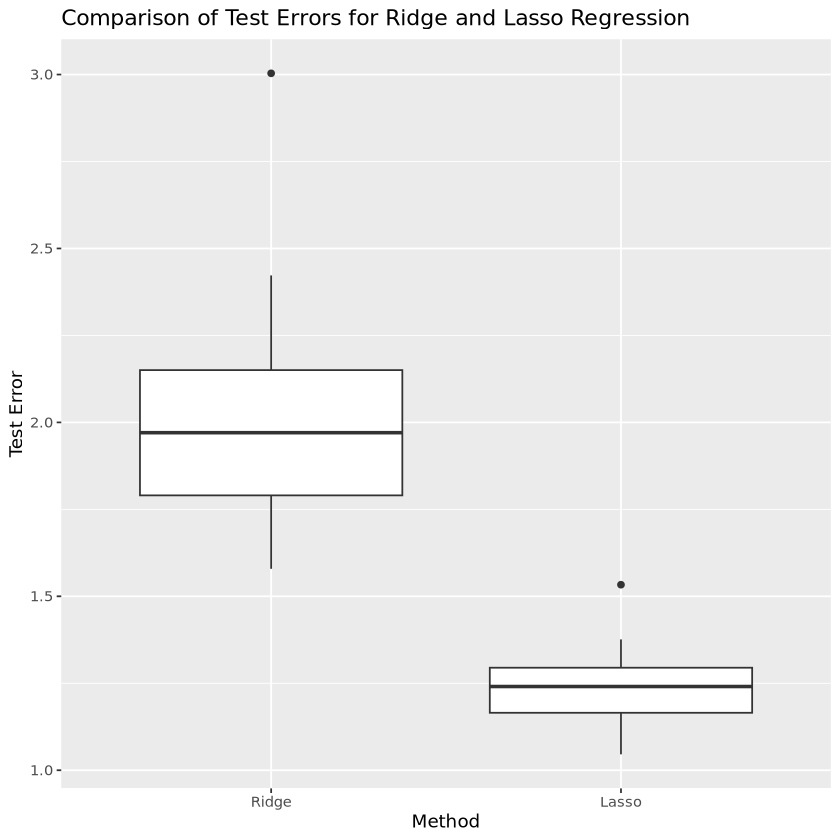

In [8]:
library(glmnet)
library(ggplot2)

# For-loop for part 1
# Initialize lists to store test errors
ridge_test_errors <- vector("list", 50)
lasso_test_errors <- vector("list", 50)

for (seed in 2:50) {
  set.seed(seed)

  # Generate training data
  X_train = array(rnorm(p*N),c(N,p))
  eps_train = rnorm(N)
  X_te = array(rnorm(p*Nte),c(Nte,p))
  eps_te = rnorm(Nte)
  # Define coefficients for the model
  beta <- rep(0, p)
  beta[1:5] <- 2
  # Generate the training response variable
  Y_train <- X_train %*% beta + eps_train
  # Generate the testing response variable
  Y_te <- X_te %*% beta + eps_te
    
  # Fit Ridge Regression and find the best lambda using cross-validation
  cv_ridge <- cv.glmnet(X_train, Y_train, alpha = 0, lambda = grid)
  best_lambda_ridge <- cv_ridge$lambda.min
  ridge_model <- glmnet(X_train, Y_train, alpha = 0, lambda = best_lambda_ridge)
  ridge_pred <- predict(ridge_model, newx = X_te, s = best_lambda_ridge)
  ridge_test_errors[[seed-1]] <- mean((Y_te - ridge_pred)^2)

  # Fit Lasso Regression and find the best lambda using cross-validation
  cv_lasso <- cv.glmnet(X_train, Y_train, alpha = 1, lambda = grid)
  best_lambda_lasso <- cv_lasso$lambda.min
  lasso_model <- glmnet(X_train, Y_train, alpha = 1, lambda = best_lambda_lasso)
  lasso_pred <- predict(lasso_model, newx = X_te, s = best_lambda_lasso)
  lasso_test_errors[[seed-1]] <- mean((Y_te - lasso_pred)^2)
}

# Combine errors into a data frame for plotting
errors_df <- data.frame(
  Ridge = unlist(ridge_test_errors),
  Lasso = unlist(lasso_test_errors)
)

# Melt the data for ggplot2
library(reshape2)
errors_melted <- melt(errors_df)

# Create boxplots of the test errors
ggplot(errors_melted, aes(x = variable, y = value)) +
  geom_boxplot() +
  xlab("Method") +
  ylab("Test Error") +
  ggtitle("Comparison of Test Errors for Ridge and Lasso Regression")


No id variables; using all as measure variables



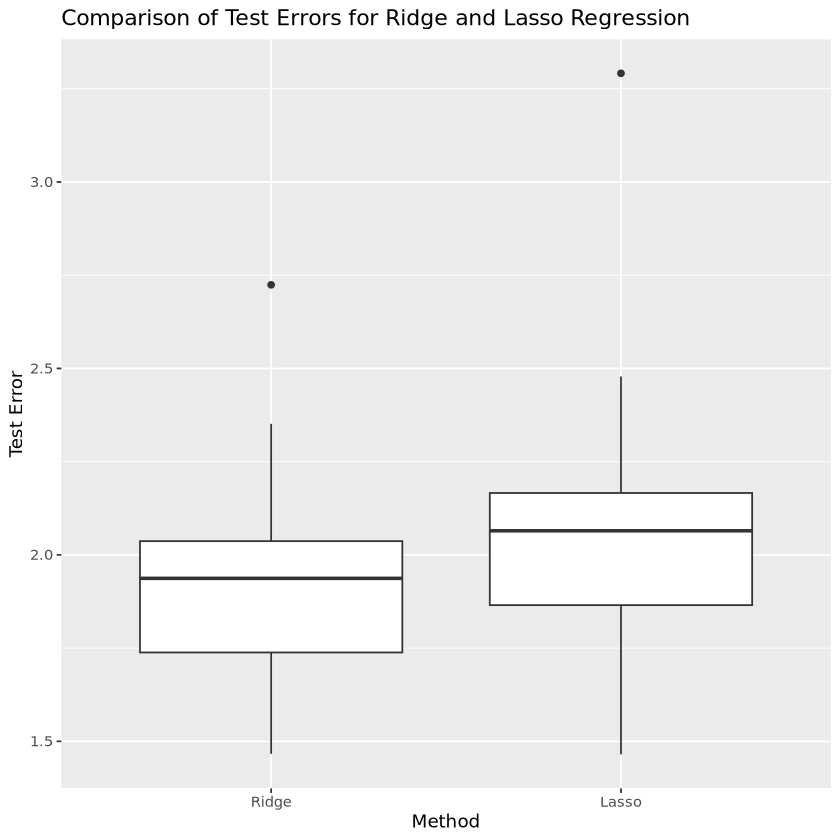

In [9]:
# For-loop for part 2
# Initialize lists to store test errors
ridge_test_errors <- vector("list", 50)
lasso_test_errors <- vector("list", 50)

for (seed in 2:50) {
  set.seed(seed)

  # Generate training data
  X_train = array(rnorm(p*N),c(N,p))
  eps_train = rnorm(N)
  X_te = array(rnorm(p*Nte),c(Nte,p))
  eps_te = rnorm(Nte)
  # Define coefficients for the model
  beta <- rep(0.5, p)
  # Generate the training response variable
  Y_train <- X_train %*% beta + eps_train
  # Generate the testing response variable
  Y_te <- X_te %*% beta + eps_te
    
  # Fit Ridge Regression and find the best lambda using cross-validation
  cv_ridge <- cv.glmnet(X_train, Y_train, alpha = 0, lambda = grid)
  best_lambda_ridge <- cv_ridge$lambda.min
  ridge_model <- glmnet(X_train, Y_train, alpha = 0, lambda = best_lambda_ridge)
  ridge_pred <- predict(ridge_model, newx = X_te, s = best_lambda_ridge)
  ridge_test_errors[[seed-1]] <- mean((Y_te - ridge_pred)^2)

  # Fit Lasso Regression and find the best lambda using cross-validation
  cv_lasso <- cv.glmnet(X_train, Y_train, alpha = 1, lambda = grid)
  best_lambda_lasso <- cv_lasso$lambda.min
  lasso_model <- glmnet(X_train, Y_train, alpha = 1, lambda = best_lambda_lasso)
  lasso_pred <- predict(lasso_model, newx = X_te, s = best_lambda_lasso)
  lasso_test_errors[[seed-1]] <- mean((Y_te - lasso_pred)^2)
}

# Combine errors into a data frame for plotting
errors_df <- data.frame(
  Ridge = unlist(ridge_test_errors),
  Lasso = unlist(lasso_test_errors)
)

# Melt the data for ggplot2
library(reshape2)
errors_melted <- melt(errors_df)

# Create boxplots of the test errors
ggplot(errors_melted, aes(x = variable, y = value)) +
  geom_boxplot() +
  xlab("Method") +
  ylab("Test Error") +
  ggtitle("Comparison of Test Errors for Ridge and Lasso Regression")